In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = './../../Database.csv' 
df = pd.read_csv(file_path)

df.head(3)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,3/23/2024,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11/29/2024,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,NaN,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,8/23/2024,8:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,NaN,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 17 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Cancelled Rides by Customer        10500 non-null   float64
 7   Reason for cancelling by Customer  10500 non-null   object 
 8   Cancelled Rides by Driver          27000 non-null   float64
 9   Driver Cancellation Reason         27000 non-null   object 
 10  Incomplete Rides                   9000 non-null    float64
 11  Incomplete Rides Reason            9000

In [4]:
df.isnull().sum()

Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64

In [5]:
df['Booking ID'].nunique()

148767

In [6]:
key_columns = ['Booking Status', 'Vehicle Type', 'Payment Method']

for col in key_columns:
    if col in df.columns:
        print(f"\nDistribution for '{col}':")
        counts = df[col].value_counts(dropna=False)
        percentages = df[col].value_counts(dropna=False, normalize=True) * 100
        
        distribution = pd.DataFrame({'Count': counts, 'Percentage (%)': percentages.round(2)})
        print(distribution)


Distribution for 'Booking Status':
                       Count  Percentage (%)
Booking Status                              
Completed              93000            62.0
Cancelled by Driver    27000            18.0
No Driver Found        10500             7.0
Cancelled by Customer  10500             7.0
Incomplete              9000             6.0

Distribution for 'Vehicle Type':
               Count  Percentage (%)
Vehicle Type                        
Auto           37419           24.95
Go Mini        29806           19.87
Go Sedan       27141           18.09
Bike           22517           15.01
Premier Sedan  18111           12.07
eBike          10557            7.04
Uber XL         4449            2.97

Distribution for 'Payment Method':
                Count  Percentage (%)
Payment Method                       
NaN             48000           32.00
UPI             45909           30.61
Cash            25367           16.91
Uber Wallet     12276            8.18
Credit Card     10

In [7]:
numeric_cols = ['Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating']
df[numeric_cols].describe()

,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,102000.000000,102000.000000,93000.000000,93000.000000
mean,508.295912,24.637012,4.230992,4.404584
std,395.805774,14.002138,0.436871,0.437819
min,50.000000,1.000000,3.000000,3.000000
25%,234.000000,12.460000,4.100000,4.200000
50%,414.000000,23.720000,4.300000,4.500000
75%,689.000000,36.820000,4.600000,4.800000
max,4277.000000,50.000000,5.000000,5.000000


In [8]:
cancel_cols = ['Reason for cancelling by Customer', 'Driver Cancellation Reason', 'Incomplete Rides Reason']
for col in cancel_cols:
    if col in df.columns:
        print(f"\nReasons in '{col}':")
        print(df[col].value_counts())


Reasons in 'Reason for cancelling by Customer':
Reason for cancelling by Customer
Wrong Address                                   2362
Change of plans                                 2353
Driver is not moving towards pickup location    2335
Driver asked to cancel                          2295
AC is not working                               1155
Name: count, dtype: int64

Reasons in 'Driver Cancellation Reason':
Driver Cancellation Reason
Customer related issue                 6837
The customer was coughing/sick         6751
Personal & Car related issues          6726
More than permitted people in there    6686
Name: count, dtype: int64

Reasons in 'Incomplete Rides Reason':
Incomplete Rides Reason
Customer Demand      3040
Vehicle Breakdown    3012
Other Issue          2948
Name: count, dtype: int64


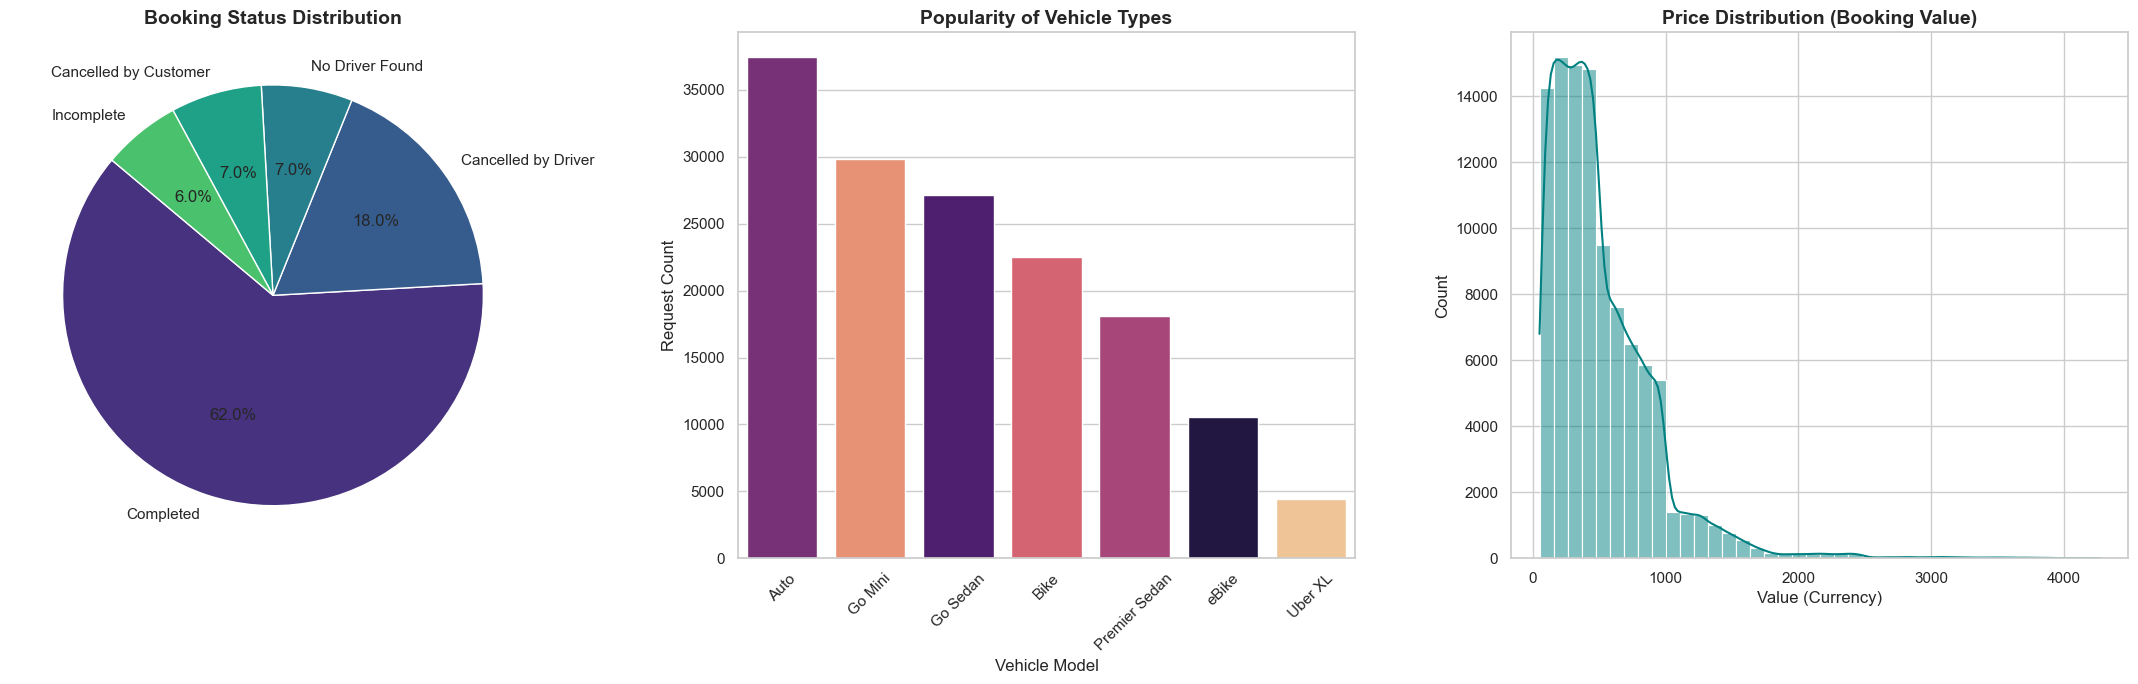

In [9]:
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(22, 7))

status_counts = df['Booking Status'].value_counts()
axes[0].pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', 
            startangle=140, colors=sns.color_palette('viridis'))
axes[0].set_title('Booking Status Distribution', fontsize=14, fontweight='bold')

sns.countplot(data=df, x='Vehicle Type', ax=axes[1], palette='magma', hue=df['Vehicle Type'], order=df['Vehicle Type'].value_counts().index)
axes[1].set_title('Popularity of Vehicle Types', fontsize=14, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_xlabel('Vehicle Model')
axes[1].set_ylabel('Request Count')

sns.histplot(df['Booking Value'].dropna(), bins=40, kde=True, ax=axes[2], color='teal')
axes[2].set_title('Price Distribution (Booking Value)', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Value (Currency)')

plt.tight_layout()
plt.savefig('eda_charts.png', dpi=300)
plt.show()